# CAPSTONE PROJECT

### The Battle of Neighbourhood

#### Introduction

This project explores the best place for Italian restaurants throughout the New York City. According to Wikipedia, New York City has the largest population of Italian Americans in the United States of America as well as North America, many of whom inhabit ethnic enclaves in Brooklyn, the Bronx, Manhattan, Queens, and Staten Island. New York City is home to the third largest Italian population outside of Italy. Over 1.3 million Italians and Italian-Americans live in the greater New York City metro area, with about 800,000 living within one of the five New York City boroughs.So to find and enjoy Italian cuisine possibilty is more here. This project will show which are the best restaurants in neighborhoods and boroughs of New York City and if I want to open a Italian restaurant which place would be best? 

#### Data

In order to answer the above questions, data on New York City neighborhoods, boroughs, latitude, longitude, restaurants, and restaurant ratings and tips are required.

New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset

All data related to locations and quality of Italian restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

#### Methodology

• Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

• FourSquare be used to locate all venues and then filtered by Italian restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on rankings

• Finally, the data will be visually assessed using graphing from various Python libraries.

#### Problem Statement

Load required libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
#import os
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Loaded libraries!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
neighborhoods_data = newyork_data['features']

Transform the data into pandas dataframe

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Dataframe is empty

In [7]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [8]:
for data in neighborhoods_data:
    borough = data['properties']['borough']
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                         'Neighborhood': neighborhood_name,
                                         'Latitude': neighborhood_lat,
                                         'Longitude': neighborhood_lon}, ignore_index = True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Check the Borough and Neighborhoods count

In [10]:
neighborhoods.shape

(306, 4)

Now let's analyze data. We can see that Manhattan has less number of neighborhoods than other boroughs

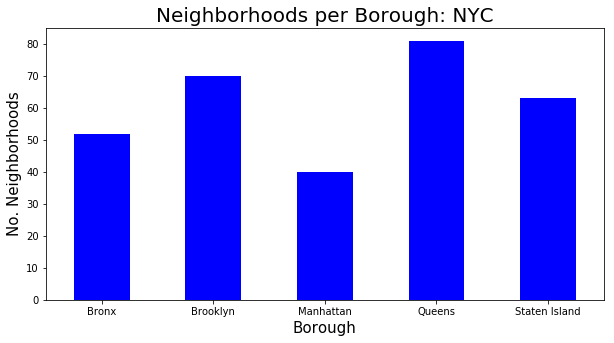

In [11]:
neighborhoods.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color='blue')
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

Now we will utilizing the Foursquare API to explore the neighborhoods and segment them.

Below are the Foursquare credentials and version

In [12]:
CLIENT_ID = 'EKLJUYRXW2E4JAAPSOWQE0AOHILN5MIE1J21SUZ1E3DM2LB1' 
CLIENT_SECRET = 'CSX5HKWZ44CFSZFPBE0HLT5FSXCLXZ50NGT5RCEKWELU1DJA'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EKLJUYRXW2E4JAAPSOWQE0AOHILN5MIE1J21SUZ1E3DM2LB1
CLIENT_SECRET:CSX5HKWZ44CFSZFPBE0HLT5FSXCLXZ50NGT5RCEKWELU1DJA


Function to get the venues for all the neighborhoods in New York City

In [13]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [14]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_resturants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(neighborhoods),')','Italian Resturants in '+Neighborhood+', '+Borough+':'+str(len(italian_resturants)))
    print(row)
    for resturant_detail in italian_resturants.values.tolist():
        id, name , category=resturant_detail
        italian_rest_ny = italian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Italian Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Italian Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Italian Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Italian Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Italian Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Italian Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Italian Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Italian Resturants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Italian Resturants in Norwood, Bronx:0
['Bronx', '

In [15]:
italian_rest_ny.to_csv('italian_rest_ny_tocsv1.csv')

In [16]:
italian_rest_ny = pd.read_csv('italian_rest_ny_tocsv1.csv')
italian_rest_ny.drop(['Unnamed: 0'], axis=1,inplace= True)
italian_rest_ny.tail()

,Borough,Neighborhood,ID,Name
234,Queens,Sunnyside Gardens,5699aa86498ef437b2fd7102,Zio Luigi
235,Brooklyn,Fulton Ferry,593c0d2262420b7feccc3048,Cecconi's
236,Brooklyn,Dumbo,593c0d2262420b7feccc3048,Cecconi's
237,Staten Island,Prince's Bay,4c091311a1b32d7f5efb96f0,Certo's Gourmet Foods & Caterers
238,Staten Island,Lighthouse Hill,5079ccdce4b065f1dd8155ad,Casa verde


In [17]:
italian_rest_ny.shape

(239, 4)

After seeing below analysis we can see that Manhattan has least number of neighborhoods but it has the highest number of Italian restaurants

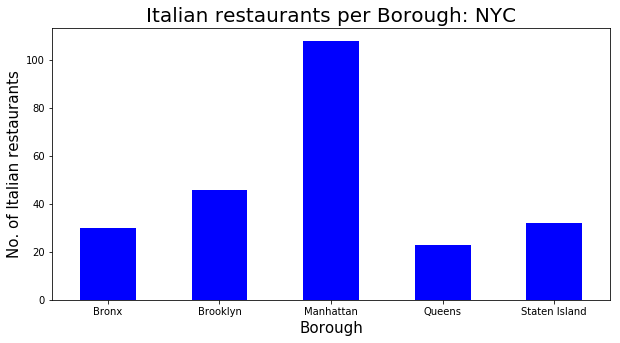

In [18]:
italian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5),color='blue')
plt.title('Italian restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize=15)
plt.ylabel('No. of Italian restaurants', fontsize = 15)
plt.xticks(rotation='horizontal')
plt.show()

After seeing below analysis, we can see that Belmont neighborhood has the highest number of Italian restaurants in all NYC

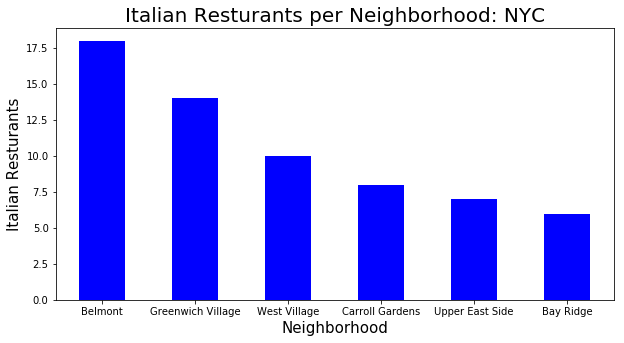

In [19]:
NOofNeigh = 6 
italian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color='blue')
plt.title('Italian Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Italian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

We can see below that Belmont is under the Bronx borough not Manhattan

In [20]:
italian_rest_ny[italian_rest_ny['Neighborhood']=='Belmont']


,Borough,Neighborhood,ID,Name
5,Bronx,Belmont,4acf80aef964a52025d420e3,Tino's Delicatessen
6,Bronx,Belmont,4af71916f964a520cf0522e3,Michaelangelo's Coal Fired Brick Oven Pizza Re...
7,Bronx,Belmont,59050f51b23dfa5f6649e678,Arthur Avenue Fiasco
8,Bronx,Belmont,4bb6470cef159c7465b275f7,Calabria Pork Store
9,Bronx,Belmont,4bc22a22920eb713bcc51b2c,Tra Di Noi
10,Bronx,Belmont,4aa425bef964a5208e4520e3,Dominick's Restaurant
11,Bronx,Belmont,4af0fa29f964a52060e021e3,Antonio's Trattoria
12,Bronx,Belmont,4b5514c4f964a5207cda27e3,Enzo's
13,Bronx,Belmont,4b5a4c8ff964a52049bb28e3,Emilia's Restaurant
14,Bronx,Belmont,4aa193d5f964a520124120e3,Mario's Restaurant & Catering


Function to get the venue details

In [21]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    
    #venue_data=results["response"]['venue']
    venue_details=[]
    try:
        venue_id=results["response"]['venue']['id']
        venue_name=results["response"]['venue']['name']
        venue_likes=results["response"]['venue']['likes']['count']
        venue_rating=results["response"]['venue']['rating']
        venue_tips=results["response"]['venue']['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


In [22]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
italian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in italian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(italian_rest_ny),')','processed')
    italian_rest_stats_ny = italian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
italian_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5df49c6c29ce6a001bcf7faa'}, 'response': {'venue': {'id': '511edb6de4b0d58346fd272d', 'name': "Patrizia's Of Woodlawn", 'contact': {'phone': '7188845700', 'formattedPhone': '(718) 884-5700'}, 'location': {'address': '4358 Katonah Ave', 'lat': 40.900638399332884, 'lng': -73.86772361835486, 'labeledLatLngs': [{'label': 'display', 'lat': 40.900638399332884, 'lng': -73.86772361835486}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4358 Katonah Ave', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/patrizias-of-woodlawn/511edb6de4b0d58346fd272d', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 14}, 'url': 'http:

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
234,Queens,Sunnyside Gardens,5699aa86498ef437b2fd7102,Zio Luigi,8,7.0,3
235,Brooklyn,Fulton Ferry,593c0d2262420b7feccc3048,Cecconi's,319,8.7,71
236,Brooklyn,Dumbo,593c0d2262420b7feccc3048,Cecconi's,319,8.7,71
237,Staten Island,Prince's Bay,0,0,0,0.0,0
238,Staten Island,Lighthouse Hill,5079ccdce4b065f1dd8155ad,Casa verde,7,7.5,3


In [23]:
italian_rest_stats_ny.to_csv('italian_rest_stats_ny_csv.csv')

In [24]:
italian_rest_stats_ny.shape

(239, 7)

In [25]:
italian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
Borough         239 non-null object
Neighborhood    239 non-null object
ID              239 non-null object
Name            239 non-null object
Likes           239 non-null object
Rating          239 non-null float64
Tips            239 non-null object
dtypes: float64(1), object(6)
memory usage: 13.1+ KB


In [26]:
italian_rest_stats_ny['Likes']=italian_rest_stats_ny['Likes'].astype('float64')
italian_rest_stats_ny['Tips']=italian_rest_stats_ny['Tips'].astype('float64')
italian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
Borough         239 non-null object
Neighborhood    239 non-null object
ID              239 non-null object
Name            239 non-null object
Likes           239 non-null float64
Rating          239 non-null float64
Tips            239 non-null float64
dtypes: float64(3), object(4)
memory usage: 13.1+ KB


In [27]:
italian_rest_stats_ny.describe()

,Likes,Rating,Tips
count,239.000000,239.000000,239.000000
mean,131.970711,7.492887,53.288703
std,236.346836,2.009241,108.182096
min,0.000000,0.000000,0.000000
25%,15.000000,7.450000,7.500000
50%,41.000000,8.000000,18.000000
75%,120.500000,8.500000,51.000000
max,1440.000000,9.400000,1136.000000


In [28]:
#Restaurant with max likes
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                    Gramercy
ID              4afb2990f964a520a91b22e3
Name                            Maialino
Likes                               1440
Rating                                 9
Tips                                 465
Name: 147, dtype: object

In [29]:
#Restaurant with max rating
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                 Fort Greene
ID              5a00f3538496ca58fd9e2856
Name                  Evelina Restaurant
Likes                                177
Rating                               9.4
Tips                                  34
Name: 53, dtype: object

In [30]:
# Resturant with maximum Tips
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Tips'].idxmax()]

Borough                    Staten Island
Neighborhood               West Brighton
ID              4b5b58dbf964a52088f628e3
Name                        Panini Grill
Likes                                 20
Rating                               8.2
Tips                                1136
Name: 176, dtype: object

In [31]:
ny_neighborhood_stats=italian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
13,Bushwick,9.300000
89,Tribeca,9.200000
11,Boerum Hill,9.200000
56,Lower East Side,8.900000
45,Hamilton Heights,8.900000
25,Corona,8.800000
61,Midtown South,8.800000
67,Noho,8.716667
38,Fulton Ferry,8.700000
28,Dumbo,8.700000


In [32]:
ny_borough_stats=italian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.288889
0,Bronx,7.583333
1,Brooklyn,7.504348
3,Queens,7.134783
4,Staten Island,4.962500


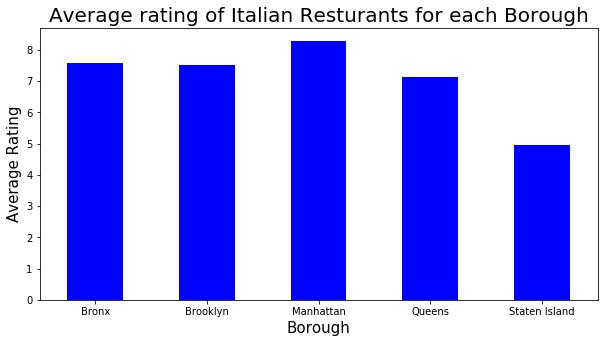

In [33]:
italian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color='blue')
plt.title('Average rating of Italian Resturants for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

We will visually map the neighborhoods with an average rating greater than or equal to 8 after joining the approprite dfs to include latitudes and longitudes.

In [34]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
4,Battery Park City,8.050000
11,Boerum Hill,9.200000
13,Bushwick,9.300000
14,Carnegie Hill,8.150000
17,Chinatown,8.100000
18,City Island,8.300000
21,Clinton Hill,8.450000
22,Cobble Hill,8.300000
24,Concourse Village,8.200000
25,Corona,8.800000


In [35]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,neighborhoods, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Battery Park City,40.711932,-74.016869,8.050000
1,Brooklyn,Boerum Hill,40.685683,-73.983748,9.200000
2,Brooklyn,Bushwick,40.698116,-73.925258,9.300000
3,Manhattan,Carnegie Hill,40.782683,-73.953256,8.150000
4,Manhattan,Chinatown,40.715618,-73.994279,8.100000
5,Bronx,City Island,40.847247,-73.786488,8.300000
6,Brooklyn,Clinton Hill,40.693229,-73.967843,8.450000
7,Brooklyn,Cobble Hill,40.687920,-73.998561,8.300000
8,Bronx,Concourse Village,40.824780,-73.915847,8.200000
9,Queens,Corona,40.742382,-73.856825,8.800000


In [36]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [37]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [38]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

#### Result/Conclusion

Manhattan and Queens have the best rated Italian restaurants on average. Queens and The Bronx have the least amount of Italian restaurants per borough. However, of note, Belmont of The Bronx is the neighborhood in all of NYC with the most Italian Restaurants. Despite Manhattan having the least number of neighborhoods in all five boroughs, it has the most Italian restaurants. Based on this information, I would state that Manhattan and Queens are the best locations for Italian cuisine in NYC. To have the best shot of success, I would open an Italian restaurants in Queens. Queens has multiple neighborhoods with average ratings exceeding 8.0 of a scale of 1.0 to 10.0 and has the least number of Italian restaurants making competition easier than in other boroughs.